<a href="https://colab.research.google.com/github/KimberlySalazarB/Actividad1/blob/main/Tarea_de_comunicaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
url = "https://raw.githubusercontent.com/kapumota/Cuadernos/main/CLI/data.tsv"
datos=pd.read_csv(url, sep='\t')
datos

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


**1.- Mire en la parte superior e inferior de data.tsv entregado en esta actividad. Piensa en cómo se estructuran los datos. ¿Qué crees que significa cada columna? ¿Qué crees que significa cada fila?**

Las columnas representan los parametros o variables.

In [4]:
datos.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

La filas representan los ejemplos o datos recopilados.





In [5]:
datos.iloc[0]

order_id                                         1
quantity                                         1
item_name             Chips and Fresh Tomato Salsa
choice_description                             NaN
item_price                                  $2.39 
Name: 0, dtype: object

In [6]:
datos.head(1)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39


**2.-¿Cuántos pedidos parece haber?**

In [7]:
datos['quantity'].sum()

4972

Son 4972 pedidos

**3.-¿Cuántas líneas hay en este archivo?**

Hay 4622 filas

In [8]:
datos.shape[0]

4622

**4.-¿Qué burrito es más popular, steak o chicken?**

El Burrito Chicken porque tiene 553.

In [9]:
datos['item_name'].str.count('Steak Burrito').sum()

368

In [10]:
datos['item_name'].str.count('Chicken Burrito').sum()

553

**5.-¿Los burritos de pollo suelen tener frijoles negros o frijoles pintos?**

Ambos frijoles, por un lado, hay 282 burritos de pollo que suelen tener frijoles negros y 105 que tienen frijores pintos.

In [11]:
chicken_burritos = datos[datos['item_name'] == 'Chicken Burrito']
black_beans = chicken_burritos[chicken_burritos['choice_description'].str.contains('Black Beans')].shape[0]
pinto_beans = chicken_burritos[chicken_burritos['choice_description'].str.contains('Pinto Beans')].shape[0]

In [12]:
black_beans

282

In [13]:
pinto_beans

105

**6.- Usa la línea de comandos para descubrir algo interesante sobre los datos dados.**

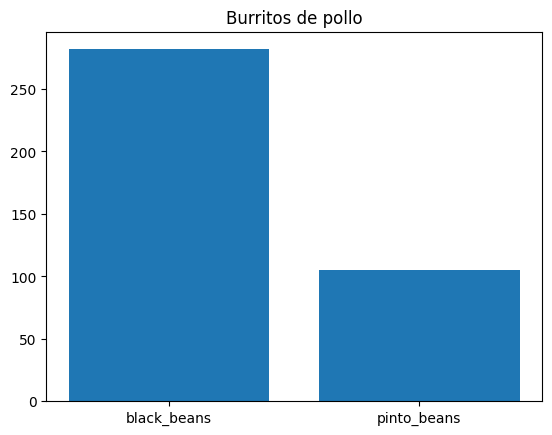

In [14]:
chicken_burritos = datos[datos['item_name'] == 'Chicken Burrito']
black_beans = chicken_burritos[chicken_burritos['choice_description'].str.contains('Black Beans')].shape[0]
pinto_beans = chicken_burritos[chicken_burritos['choice_description'].str.contains('Pinto Beans')].shape[0]
x=["black_beans","pinto_beans"]
y=[black_beans,pinto_beans]
plt.title('Burritos de pollo')
plt.bar(x,y)
plt.show()

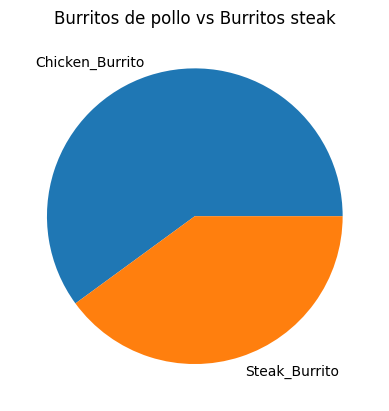

In [15]:
Chicken_Burrito= datos['item_name'].str.count('Chicken Burrito').sum()
Steak_Burrito= datos['item_name'].str.count('Steak Burrito').sum()
x=["Chicken_Burrito","Steak_Burrito"]
y=[Chicken_Burrito,Steak_Burrito]
plt.title('Burritos de pollo vs Burritos steak')
plt.pie(y, labels=x)
plt.show()

In [16]:
datos.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


<ipython-input-16-5a1838f78361>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  datos.info(verbose=True,null_counts=True)


In [17]:
4622-3376

1246

Podemos observar en la columna de descripción del pedido hay 3376 pedidos que no estan vacios, lo que quiere decir es que hay 1246 pedidos con descripción vacios. Esto también podemos comprobarlo en la grafica siguiente.

<Axes: >

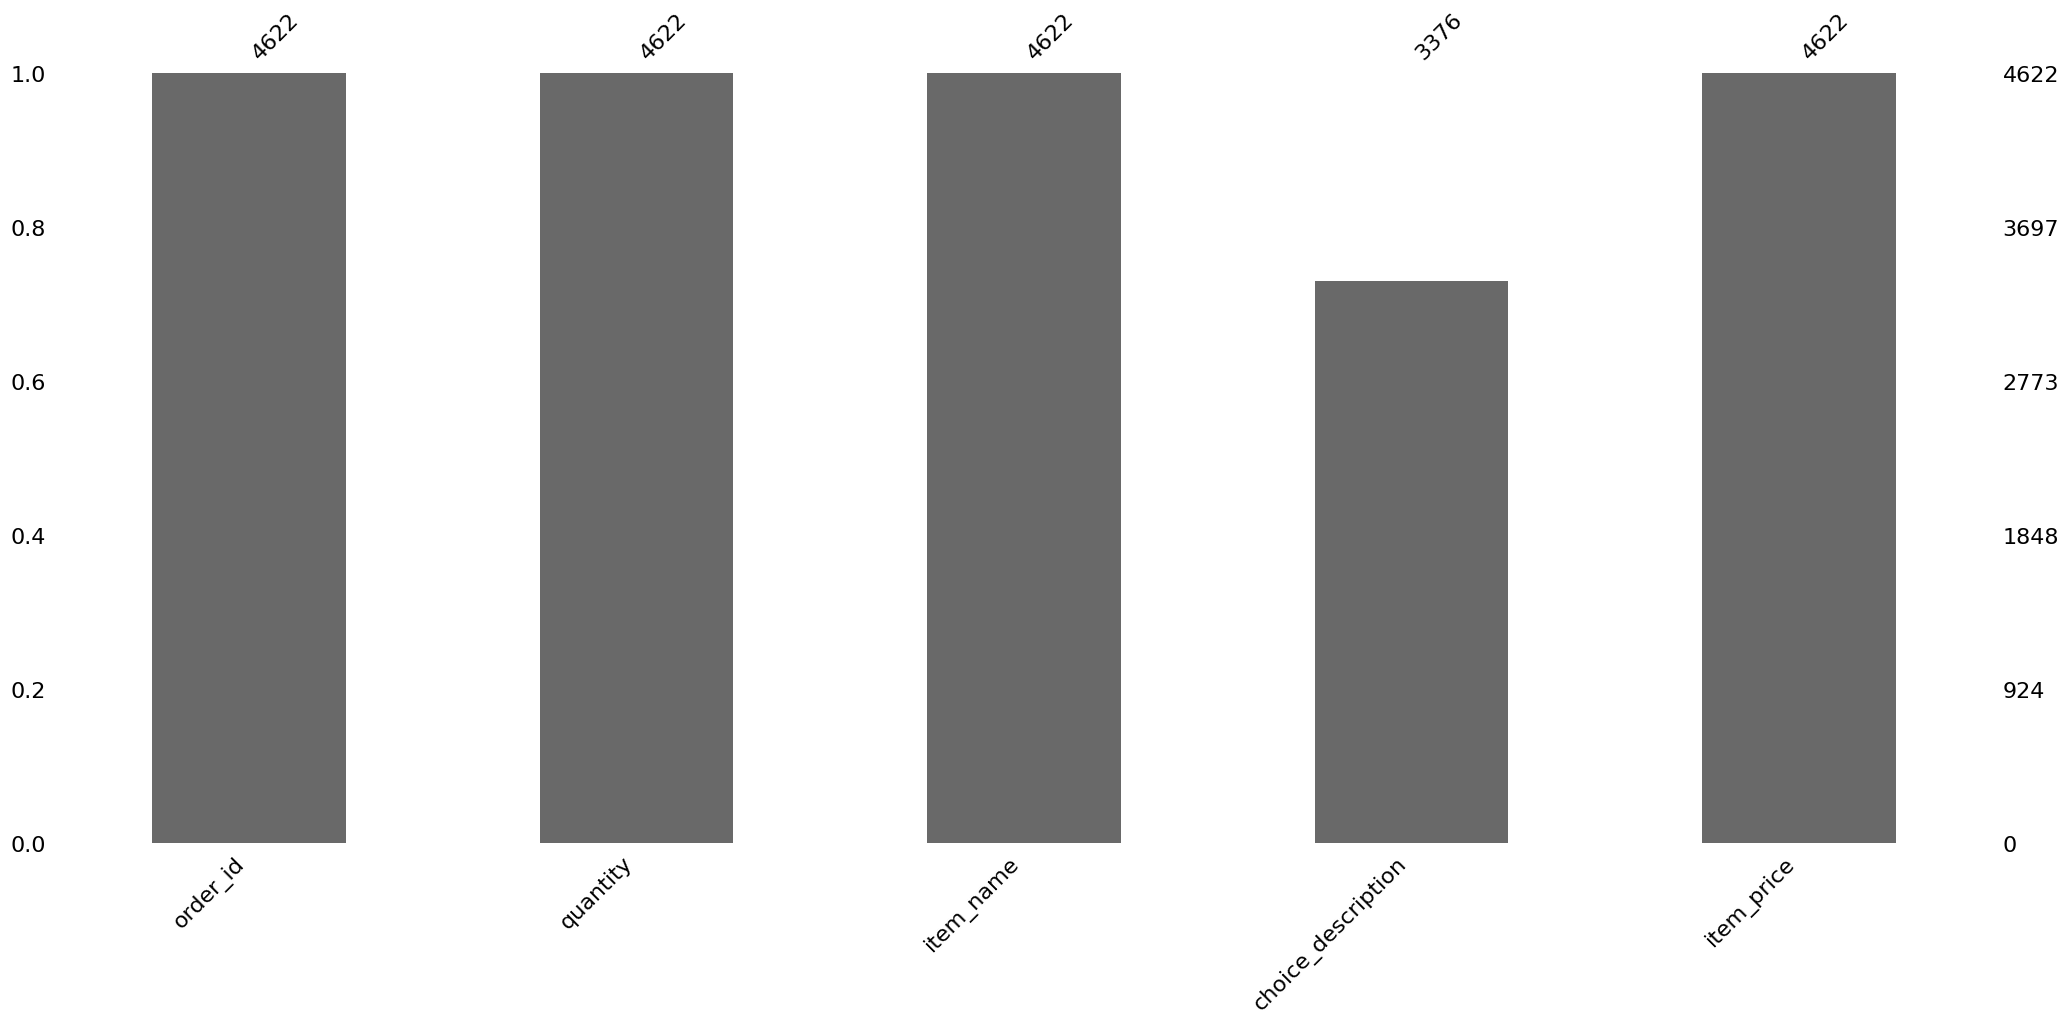

In [18]:
msno.bar(datos.sample(4622))